## Lab | Inferential statistics - T-test & P-value

In a packing plant, a machine packs cartons with jars. It is supposed that a new machine will pack faster on the average than the machine currently used. To test that hypothesis, the times it takes each machine to pack ten cartons are recorded. The results, in seconds, are shown in the tables in the file files_for_lab/machine.txt. Assume that there is sufficient evidence to conduct the t test, does the data provide sufficient evidence to show if one machine is better than the other

**Null hypothesis - H0:** packing speed of the old and new machine are the same<br/>
speed m_o = speed m_n<br/>

**Alternative hypothesis - Ha:** the new machine has a higher packaging speed<br/>
speed m_o != speed m_n

Does the data provide sufficient evidence to show if one machine is better than the other???<br/>

We are using a one tailed t test because we only are interested if the speed of the new machine is higher then the old ones.
So we only need to look at the right end of the curve.

In [1]:
# importing needed libraries

import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import t
from scipy.stats import norm
from scipy.stats import ttest_1samp
import math

In [2]:
ls

Untitled.ipynb       machine2.csv         student_gpa.txt
machine.txt          machine2.xlsx        t-test-formular.png


In [3]:
# importing data

data = pd.read_csv('machine2.csv', sep=';')
data

,New machine,Old machine
0,42.1,42.7
1,41.0,43.6
2,41.3,43.8
3,41.8,43.3
4,42.4,42.5
5,42.8,43.5
6,43.2,43.1
7,42.3,41.7
8,41.8,44.0
9,42.7,44.1


In [4]:
# population = old machine
# sample = new machine

pop_n = 10
sample_n = 10

In [5]:
sample_mean = data.mean()['New machine']
sample_mean 

42.14

In [6]:
pop_mean = data.mean()['Old machine']
pop_mean 

43.230000000000004

In [18]:
pop_mean - sample_mean 

# the old machine is on avg 1 s quicker

# but is this enough to say that the old machine is quicker then the new one?
# is it statistically significant?

1.0900000000000034

In [7]:
sample_std = data.std()['New machine']
sample_std

0.6834552736727638

In [8]:
sample_std = data.std()['Old machine']
sample_std

0.7498888806572157

### degree of freedom

Also, we need the degrees of freedom which is number of samples added and then -2.<br/>

𝑑o𝑓=𝑛1+𝑛2–2

In [15]:
# calculating level of freedom
dof = 10+10-2
dof

# looking at the table for a dof of 18, a one tail and a 0.05
# our critical number should be 1.734

18

### T-Test

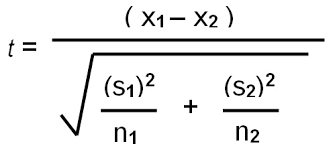

In the formula X1 and X2 are the means of the two populations and S1, S2 are the standard deviations.

In [9]:
data.columns

Index(['New machine', 'Old machine'], dtype='object')

In [10]:
# calculating t statistic step by step

s1 = data.std()['New machine']/np.sqrt(sample_n)
s1

0.21612753436596469

In [11]:
s2 = data.std()['Old machine']/np.sqrt(pop_n)
s2

0.2371356854910985

In [12]:
sed = np.sqrt((s1**2) + (s2**2))
sed

0.3208495666888837

In [13]:
# finale t stat
t_stat =(data.mean()['New machine'] - data.mean()['Old machine'])/sed
t_stat

-3.397230706117603

In [14]:
# t stat with given formula

t_stat2 = ttest_ind(data['New machine'], data['Old machine'])
t_stat2

Ttest_indResult(statistic=-3.3972307061176026, pvalue=0.0032111425007745158)

In [19]:
# p value distinct
t_dist = t(18)
2 * t_dist.cdf(-3.397)

0.00321278348605011

### Critical Number

Now Having the T statistic we have to find the critical number at the T statistic table:

- one-tailed test
- alpha level = 0.05
- dof = 18

**1.73**

In our case, the t-statistic (-3.39) < t-critical (1.73).

This means, the t-statistic does NOT falls in the rejection zone and so, we accept the null hypothesis and conclude that the means are in fact similar.

In [16]:
t.sf(t_stat, dof)

0.9983944287496127

### Confidence intervals

In [17]:
absoluteZ = abs(norm.ppf(0.05))
lowerCI = sample_mean - absoluteZ*sample_std/math.sqrt(sample_n-1)
lowerCI

41.72884751828013

With 95% confidence, the population mean is between over 41.72, based on 10 sample.